In [77]:
from keras.models import Model
from keras.layers import *
import numpy as np
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import sys
sys.path.append("/Users/dsaha/Python/alpao_calibration")
from calibration import Calibration
%matplotlib inline
import json
from scipy.spatial.distance import cdist
mirror = Calibration()
import datetime
import os

In [79]:
Name = {0: 'ObliqueAstigmation', 1: 'Defocus', 2: 'VerticalAstigmation', 3: 'VerticalTrefoil', 4: 'VerticalComa', 5: 'ObliqueTrefoil'}

In [40]:
dataset = np.loadtxt("/Volumes/Debayan/Calibration_data_Alpao_BScope/Acquisition/20180205_Random_10000.txt")
actuators = dataset[:,:97]
zernikes = dataset[:,100:]

#dataset = np.loadtxt("/Users/dsaha/Desktop/calibration_measurement_random_2000.txt")
#actuators1 = dataset[:, :97]
#zernikes1 = dataset[:, 97:]

#np.savetxt("/Users/dsaha/Desktop/TrialActuatorsNew_1.txt" , actuators[1,:].reshape(1,97), delimiter=",")
#np.savetxt("/Users/dsaha/Desktop/TrialActuatorsOld.txt" , new, delimiter=",")
#print("New Zernikes" + str(zernikes[1,:]))
#print("Old Zernikes" + str(zernikes1[0,:]))
#np.mean(actuators,axis=-1)
#print(np.std(zernikes,axis=1))
#plt.hist(actuators.flatten(),50);
#plt.subplot(1,2,1)
#plt.hist(zernikes.flatten(),50);
#plt.subplot(1,2,2)
#plt.hist(zernikes1.flatten(),50);

#np.min(zernikes)
#plt.figure(figsize=(10,7))
#plt.subplot(2,3,1)
#mirror.plot_acc(actuators[1,:], cmap = "coolwarm")
#plt.subplot(2,3,2)
#plt.imshow(np.sum([_z*mirror.zern_modes[i] for i,_z in enumerate(zernikes[1,:])], axis = 0))
#plt.axis('off')
#plt.subplot(2,3,3)
#plt.bar(range(0,66),zernikes[1,:])
 
#plt.subplot(2,3,4)
#mirror.plot_acc(actuators1[100,:], cmap = "coolwarm")
#plt.subplot(2,3,5)
#plt.imshow(np.sum([_z*mirror.zern_modes[i] for i,_z in enumerate(zernikes1[100,:])], axis = 0))
#plt.axis('off')
#plt.subplot(2,3,6)
#plt.bar(range(0,66),zernikes1[0,:])

In [275]:
#da = cdist(actuators,actuators1)
#dz = cdist(zernikes[:,3:],zernikes1[:,3:])
#plt.hist(dz.flatten(),50);
#dz.shape

In [ ]:
#print(np.where(da<0.27))
#print(dz[4774,1385])
#print(np.min(dz))
#print(np.where(dz<0.1767))
#dz[9510,1212]

In [756]:
#plt.subplot(2,2,1)
#mirror.plot_acc(actuators[4774,:], cmap = "coolwarm")
#plt.subplot(2,2,2)
#plt.imshow(np.sum([_z*mirror.zern_modes[i] for i,_z in enumerate(zernikes[4774,3:])], axis = 0))
#plt.axis('off') 
#plt.subplot(2,2,3)
#mirror.plot_acc(actuators1[1385,:], cmap = "coolwarm")
#plt.subplot(2,2,4)
#plt.imshow(np.sum([_z*mirror.zern_modes[i] for i,_z in enumerate(zernikes1[1385,3:])], axis = 0))
#plt.axis('off')

In [757]:
#plt.figure(figsize=(10,7))
#plt.subplot(2,2,1)
#plt.plot(zernikes[4774,3:])
#plt.subplot(2,2,2)
#plt.plot(actuators[4774,:])
#plt.subplot(2,2,3)
#plt.plot(zernikes1[1385,3:])
#plt.subplot(2,2,4)
#plt.plot(actuators1[1385,])

In [758]:
#plt.subplot(2,2,1)
#mirror.plot_acc(actuators[9510,:], cmap = "coolwarm")
#plt.subplot(2,2,2)
#plt.imshow(np.sum([_z*mirror.zern_modes[i] for i,_z in enumerate(zernikes[9510,3:])], axis = 0))
#plt.axis('off') 
#plt.subplot(2,2,3)
#mirror.plot_acc(actuators1[1212,:], cmap = "coolwarm")
#plt.subplot(2,2,4)
#plt.imshow(np.sum([_z*mirror.zern_modes[i] for i,_z in enumerate(zernikes1[1212,3:])], axis = 0))
#plt.axis('off')

In [759]:
#plt.figure(figsize=(10,7))
#plt.subplot(2,2,1)
#plt.plot(zernikes[9510,:])
#plt.subplot(2,2,2)
#plt.plot(actuators[9510,:])
#plt.subplot(2,2,3)
#plt.plot(zernikes1[1212,:])
#plt.subplot(2,2,4)
#plt.plot(actuators1[1212,])


In [760]:
#actuators.shape, zernikes.shape
#print(np.min(actuators),np.max(actuators))
#print(np.min(actuators1),np.max(actuators1))

In [41]:
inp = Input(shape=(63,))

lay = Dense(64, activation="tanh")(inp)

#for _ in range(3):
#    lay = Dense(128, activation="sigmoid")(lay)
    
oup = Dense(97)(lay)
#oup = Dense(97)(inp)
m = Model(inp,oup)

In [42]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 63)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4096      
_________________________________________________________________
dense_7 (Dense)              (None, 97)                6305      
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [43]:
m.compile(Adam(lr=0.0004),'mse')
#m.compile(loss='mean_squared_logarithmic_error',optimizer=Adam(0.0004))

In [44]:
hist = m.fit(zernikes,actuators,batch_size=10,epochs=200, validation_split=.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/200
9000/9000 [==============================] - 1s 100us/step - loss: 0.0035 - val_loss: 0.0025
Epoch 2/200
9000/9000 [==============================] - 1s 94us/step - loss: 0.0023 - val_loss: 0.0021
Epoch 3/200
9000/9000 [==============================] - 1s 79us/step - loss: 0.0020 - val_loss: 0.0019
Epoch 4/200
9000/9000 [==============================] - 1s 80us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 5/200
9000/9000 [==============================] - 1s 76us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 6/200
9000/9000 [==============================] - 1s 77us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 7/200
9000/9000 [==============================] - 1s 79us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 8/200
9000/9000 [==============================] - 1s 75us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/200
9000/9000 [==============================] - 1s 82us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 10/200
90

9000/9000 [==============================] - 1s 78us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 156/200
9000/9000 [==============================] - 1s 85us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 157/200
9000/9000 [==============================] - 1s 98us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 158/200
9000/9000 [==============================] - 1s 86us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 159/200
9000/9000 [==============================] - 1s 74us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 160/200
9000/9000 [==============================] - 1s 74us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 161/200
9000/9000 [==============================] - 1s 75us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 162/200
9000/9000 [==============================] - 1s 77us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 163/200
9000/9000 [==============================] - 1s 73us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 164/200
9000/9000 [==============================] - 1

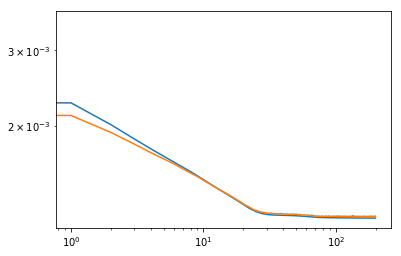

In [45]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")

In [74]:
#flat = np.zeros((1,63))
##Defocus is 5-4 = 1, Astigmation X is 4-4=0, Astigmation Y is 6-4=2
field_generate = np.zeros((1,63))
field_generate = field_generate.reshape((1,63))
field_generate[0,4] = +0.2

In [75]:
a=m.predict(field_generate)

In [57]:
#trial=m.predict(zernikes)
#trialdist = cdist(actuators,trial)

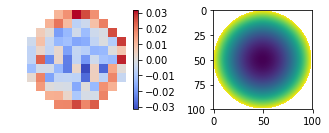

In [65]:
plt.subplot(2,2,1)
mirror.plot_acc(a, cmap = "coolwarm")
plt.subplot(2,2,2)
plt.imshow(np.sum([_z*mirror.zern_modes[i+3] for i,_z in enumerate(field_generate.T)], axis = 0))
#plt.axis('off') 
#plt.subplot(2,2,3)
#mirror.plot_acc(trial[0,:], cmap = "coolwarm")
#plt.subplot(2,2,4)
#plt.imshow(np.sum([_z*mirror.zern_modes[i] for i,_z in enumerate(zernikes[0,:])], axis = 0))
#plt.axis('off')

In [80]:
#Text file save
now = datetime.datetime.now()
os.mkdir("/Volumes/Debayan/Calibration_data_Alpao_BScope/GenerateAberrationModes_Neuonal/%s"%now)
modes_of_zern = np.array([0,1,2,3,4,5])
values = np.arange(-0.2,0.2,0.01)
for i in modes_of_zern:
    for j in values:
        field_generate = np.zeros((1,63))
        field_generate = field_generate.reshape((1,63))
        field_generate[0,i] = j
        a=m.predict(field_generate)
        np.savetxt("/Volumes/Debayan/Calibration_data_Alpao_BScope/GenerateAberrationModes_Neuonal/%s/%s_%f.txt" %(now,Name[i],j), a, delimiter=",")

In [250]:
#Json file save
now = datetime.datetime.now()
os.mkdir("/Volumes/Debayan/Calibration_data_Alpao_BScope/GenerateAberrationModes_Neuonal/%s"%now)
modes_of_zern = np.array([1])
values = np.arange(-0.1,0.1,0.01)
for i in modes_of_zern:
    for j in values:
        field_generate = np.zeros((1,63))
        field_generate = field_generate.reshape((1,63))
        field_generate[0,i] = j
        a=m.predict(field_generate)
        act = np.zeros((11,11))
        count = 0;
        for k in range(0,11):
             for l in range(0,11):
                if k+l<=2:
                    continue
                elif k+l>=18:
                    continue
                elif abs(k-l)>=8:
                    continue
                else:
                    act[k,l] = a[0,count]
                count = count+1

        ac = act.tolist()
        filepath = open("/Volumes/Debayan/Calibration_data_Alpao_BScope/GenerateAberrationModes_Neuonal/%s/%s_%f.json" %(now,Name[i],j),'w+')
        json.dump(ac,filepath)
        filepath.close()

In [764]:
#plt.figure(figsize=(10,7))
#plt.plot(trial[0])
#plt.plot(a2[0])
#plt.plot(a3[0],"r")
#plt.plot(actuators[0], "k:")

In [763]:
#plt.hist(trialdist.flatten())

In [762]:
#mirror = Calibration() 
#plt.subplot(2,2,1)
#mirror.plot_acc(a3, cmap = "coolwarm")
#plt.subplot(2,2,2)
#plt.imshow(np.sum([_z*mirror.zern_modes[i] for i,_z in enumerate(flat.T)], axis = 0))
#plt.axis('off')
#plt.subplot(2,2,3)
#mirror.plot_acc(a, cmap = "coolwarm")
#plt.subplot(2,2,4)
#plt.imshow(np.sum([_z*mirror.zern_modes[i] for i,_z in enumerate(flat.T)], axis = 0))
#plt.axis('off')

In [156]:
act = np.zeros((11,11))
count = 0;
for i in range(0,11):
     for j in range(0,11):
        if i+j<=2:
            continue
        elif i+j>=18:
            continue
        elif abs(i-j)>=8:
            continue
        else:
            act[i,j] = a[0,count]
            count = count+1

ac = act.tolist()
#filepath = open("/Volumes/Debayan/Calibration_data_Alpao_BScope/NeuronalNetworkResult/AstigmationOblique.json",'w+')
filepath = open("/Volumes/Debayan/Calibration_data_Alpao_BScope/GenerateAberrationModes_Neuonal/Test.json",'w+')
json.dump(ac,filepath)

In [258]:
#np.savetxt("/Users/dsaha/Desktop/Neuronal_Defocus.txt" , a, delimiter=",")
zernikes[0,:]

array([  2.20939000e-01,  -2.19225000e-01,  -1.21552000e-01,
         6.22660000e-02,   5.59000000e-03,   4.96400000e-03,
        -2.72480000e-02,   4.99070000e-02,   3.69300000e-02,
         6.42750000e-02,   2.70120000e-02,   2.86800000e-03,
         7.10500000e-03,   7.00400000e-03,   7.85600000e-03,
         2.35540000e-02,  -1.24700000e-03,   3.23910000e-02,
         4.20580000e-02,  -2.83260000e-02,  -2.25070000e-02,
         4.90000000e-05,  -1.93040000e-02,   3.89200000e-03,
        -1.16270000e-02,   2.81180000e-02,  -9.25400000e-03,
        -1.20910000e-02,  -1.50800000e-02,  -1.72120000e-02,
         5.50000000e-03,  -1.87980000e-02,  -7.68000000e-03,
        -1.40350000e-02,  -2.30400000e-03,   4.14000000e-03,
         7.09600000e-03,  -1.15570000e-02,   1.24630000e-02,
        -6.93800000e-03,   1.52290000e-02,  -9.05400000e-03,
         4.05900000e-03,  -1.10740000e-02,   7.80600000e-03,
         7.52300000e-03,   6.10700000e-03,  -2.55000000e-04,
        -2.54400000e-03,

In [76]:
np.savetxt("/Volumes/Debayan/Calibration_data_Alpao_BScope/GenerateAberrationModes_Neuonal/Test.txt" , a, delimiter=",")
#np.savetxt("/Volumes/Debayan/Calibration_data_Alpao_BScope/GenerateAberrationModes_Neuonal/Flat20180131.txt" , a, delimiter=",")

In [302]:
#plt.figure(figsize=(10,7))
#plt.plot(a[0])
#plt.plot(a2[0])
#plt.plot(a3[0],"r")
#plt.plot(actuators[0], "k:")

In [299]:
#plt.subplot(2,2,1)
#plt.plot(a3[0])
#plt.subplot(2,2,2)
#plt.plot(actuators[0], "k:")

In [767]:
#M2 = m.get_weights()[0]

In [768]:
#M.shape

In [769]:
#plt.figure(figsize=(10,7))
#plt.imshow(M, cmap = "magma")
#plt.axis("off")


In [83]:
#da = cdist(actuators,actuators)
#dz = cdist(zernikes,zernikes)

In [87]:
#plt.hist(dz.flatten(),50);

In [771]:
#x1,x2 = np.where(dz<0.3)
#print(x1,x2)

In [772]:
#plt.hist(dz[dz>0].flatten(),50);

In [773]:
#delta = da/(dz+.0001)
#print(da[1130,1132]/dz[1130,1132])
#plt.hist(delta.flatten(),50);


In [774]:
#i1,i2 = np.where(delta>1.4)
#i1.size
#print(i1,i2)

In [775]:
#i1,i2 = np.where(np.bitwise_and(dz>0,dz<0.25))
#i1.size
#print(i1,i2)

In [777]:
#n = 0
#mirror = Calibration() 
#plt.figure(figsize=(10,10))
#plt.subplot(2,2,1)
#plt.imshow(np.sum([_z*mirror.zern_modes[i] for i,_z in enumerate(zernikes[0,:])], axis = 0))
#plt.axis("off")
#plt.subplot(2,2,2)
#plt.imshow(np.sum([_z*mirror.zern_modes[i] for i,_z in enumerate(zernikes1[991,:])], axis = 0))
#plt.axis("off")
#plt.subplot(2,2,3)
#mirror.plot_acc(actuators[0,:], cmap = "coolwarm")
#plt.subplot(2,2,4)
#mirror.plot_acc(actuators1[991,:], cmap = "coolwarm")

In [776]:
#i1, i2 =np.unravel_index(np.argmax(delta), delta.shape)
#print(i1,i2)

In [380]:
#a1, a2 = actuators[i1], actuators[i2]
#z1, z2 = zernikes[i1], zernikes[i2]


In [778]:
#plt.plot(zernikes[0,:])
#plt.plot(zernikes1[991,:])
#print(np.sum((zernikes[0,:] - zernikes1[991,:])**2))

In [779]:
#plt.plot(z1[3])
#plt.plot(z2[3])

In [780]:
#plt.plot(a1)
#plt.plot(a2)

In [781]:
#plt.plot(zernikes[580])
#plt.plot(zernikes[1576])
#plt.plot(zernikes[1])


In [782]:
#plt.plot(actuators[1130])
#plt.plot(actuators[1131])
#plt.plot(actuators[1132])